In [26]:
import matplotlib.pyplot as plt
from pprint import pprint as pp
import numpy as np
import pandas as pd

feature_matrix = []
target_vector1 = []
target_vector2 = []
varToNumNA = dict()

for line in open('CommViolPredUnnormalizedData.txt', 'r'):
    features_orig = line.strip().split(',')
    for i in range(len(features_orig)):
        if features_orig[i] == '?':
            try:
                varToNumNA[i] += 1
            except:
                varToNumNA[i] = 1
    
    target1 = features_orig[-2] # ViolentCrimesPerPop
    target2 = features_orig[-1] # nonViolPerPop
    #features = [ f for f in features[3:-2]] # don't include town and state name
    features = [ f for f in features_orig[11:15] ] 
    feature_matrix.append(features)
    target_vector1.append(target1)
    target_vector2.append(target2)
  

In [27]:
from sklearn.metrics import *
import numpy as np

# http://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
def statistical_measures(confusion_matrix):
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    return {'TPR':TPR, 'TNR':TNR, 'PPV':PPV, 'NPV':NPV, 'FPR':FPR, 'FNR':FNR, 'FDR':FDR, 'ACC':ACC}

In [28]:
# don't use the variables that have a lot of '?'s in th data
varToNumNA # {var : numNA}, var is the index of the variable, numNA is the nubmer of ?s

{2: 1221,
 3: 1224,
 30: 1,
 103: 1872,
 104: 1872,
 105: 1872,
 106: 1872,
 107: 1872,
 108: 1872,
 109: 1872,
 110: 1872,
 111: 1872,
 112: 1872,
 113: 1872,
 114: 1872,
 115: 1872,
 116: 1872,
 117: 1872,
 118: 1872,
 119: 1872,
 123: 1872,
 124: 1872,
 125: 1872,
 126: 1872,
 128: 1872,
 131: 208,
 132: 208,
 133: 1,
 134: 1,
 135: 13,
 136: 13,
 137: 3,
 138: 3,
 139: 3,
 140: 3,
 141: 3,
 142: 3,
 143: 91,
 144: 91,
 145: 221,
 146: 97}

In [29]:
len(features)

4

In [30]:
feature_matrix[1]
'?' in feature_matrix[1]

False

In [31]:
feature_matrix_clean = []
target_vector1_clean = []
target_vector2_clean = []
for i in range(len(feature_matrix)):
    if ('?' not in feature_matrix[i] and '?' not in target_vector1[i] and '?' not in target_vector2[i]):
        feature_matrix_clean.append([float(x) for x in feature_matrix[i]])
        target_vector1_clean.append(float(target_vector1[i]))
        target_vector2_clean.append(float(target_vector2[i]))

In [32]:
len(feature_matrix), len(feature_matrix_clean) # get rid of some data ~300

(2215, 1902)

In [33]:
AVG_CRIME = 636.6

In [34]:
data = np.array( feature_matrix_clean )
target1 = np.array( [ (1 if (x > AVG_CRIME) else 0) for x in target_vector1_clean] )
target2 = np.array( [ (1 if (x > AVG_CRIME) else 0) for x in target_vector2_clean] )

print(data)
print(target1)

[[ 12.47  21.44  10.93  11.33]
 [ 11.01  21.3   10.48  17.18]
 [ 11.36  25.88  11.01  10.28]
 ..., 
 [ 11.81  20.96   9.53  20.73]
 [ 17.16  30.01  14.73  10.42]
 [ 12.99  25.21  11.63  12.12]]
[0 0 0 ..., 0 1 1]


In [35]:
# We will use a variation of NB 
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
model = GaussianNB()
X_train, y_train1 = data, target1 
model.fit(X_train, y_train1)

GaussianNB(priors=None)

In [36]:
y_predicted = model.predict(X_train) 
y_expected = y_train1

In [37]:
# Import  metrics
from sklearn import metrics

# summarize the fit of the model

print(metrics.accuracy_score(y_expected, y_predicted))
print()
print(metrics.classification_report(y_expected, y_predicted))
print(metrics.confusion_matrix(y_expected, y_predicted))
print()

0.629863301788

             precision    recall  f1-score   support

          0       0.82      0.59      0.69      1306
          1       0.44      0.71      0.55       596

avg / total       0.70      0.63      0.64      1902

[[772 534]
 [170 426]]



In [38]:
def readFile(filename, mode="rt"):
    # rt stands for "read text"
    fin = contents = None
    try:
        fin = open(filename, mode)
        contents = fin.read()
    finally:
        if (fin != None): fin.close()
    return contents

#def indexToName(i):
#    contents = readFile('varNames.txt')
#    contents_list = contents.split('\n')
#    contents_list = [ (s.split())[1][:-1] for s in contents_list ]
#    return contents_list[i]

# get all of the variable names
contents = readFile('varNames.txt')
contents_list = contents.split('\n')
contents_list = [ (s.split())[1][:-1] for s in contents_list ]
#contents_list.index('population')

In [39]:
varNames = []
for i in varToNumNA:
    varNames += [(i, varToNumNA[i], contents_list[i])]
sorted(varNames) # variables that we didn't use: (index, # of times used, var name)

[(2, 1221, 'countyCode'),
 (3, 1224, 'communityCode'),
 (30, 1, 'OtherPerCap'),
 (103, 1872, 'LemasSwornFT'),
 (104, 1872, 'LemasSwFTPerPop'),
 (105, 1872, 'LemasSwFTFieldOps'),
 (106, 1872, 'LemasSwFTFieldPerPop'),
 (107, 1872, 'LemasTotalReq'),
 (108, 1872, 'LemasTotReqPerPop'),
 (109, 1872, 'PolicReqPerOffic'),
 (110, 1872, 'PolicPerPop'),
 (111, 1872, 'RacialMatchCommPol'),
 (112, 1872, 'PctPolicWhite'),
 (113, 1872, 'PctPolicBlack'),
 (114, 1872, 'PctPolicHisp'),
 (115, 1872, 'PctPolicAsian'),
 (116, 1872, 'PctPolicMinor'),
 (117, 1872, 'OfficAssgnDrugUnits'),
 (118, 1872, 'NumKindsDrugsSeiz'),
 (119, 1872, 'PolicAveOTWorked'),
 (123, 1872, 'PolicCars'),
 (124, 1872, 'PolicOperBudg'),
 (125, 1872, 'LemasPctPolicOnPatr'),
 (126, 1872, 'LemasGangUnitDeploy'),
 (128, 1872, 'PolicBudgPerPop'),
 (131, 208, 'rapes'),
 (132, 208, 'rapesPerPop'),
 (133, 1, 'robberies'),
 (134, 1, 'robbbPerPop'),
 (135, 13, 'assaults'),
 (136, 13, 'assaultPerPop'),
 (137, 3, 'burglaries'),
 (138, 3, 'burgl

In [40]:
from sklearn import linear_model, datasets
# use logistic reg and L1 penalty 
logreg = linear_model.LogisticRegression(C=1e5, penalty='l1',)
X = feature_matrix_clean
y = [ (1 if (x > AVG_CRIME) else 0) for x in target_vector1_clean]
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_predicted_log = logreg.predict(X)
y_expected = y_train1
print(metrics.accuracy_score(y_expected, y_predicted_log))
print()
print(metrics.classification_report(y_expected, y_predicted_log))
print(metrics.confusion_matrix(y_expected, y_predicted_log))
print()

0.68927444795

             precision    recall  f1-score   support

          0       0.71      0.91      0.80      1306
          1       0.51      0.20      0.28       596

avg / total       0.65      0.69      0.64      1902

[[1194  112]
 [ 479  117]]



In [42]:
# logistic regression w/ L1 penalty and CV
from sklearn import cross_validation
predicted = cross_validation.cross_val_predict(linear_model.LogisticRegression(penalty='l1'), X, y, cv=10)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))

0.685594111462
             precision    recall  f1-score   support

          0       0.71      0.92      0.80      1306
          1       0.50      0.17      0.25       596

avg / total       0.64      0.69      0.63      1902



In [43]:
# l1 log reg, CV
cm2 = confusion_matrix(y, predicted)
statistical_measures(cm2)

{'ACC': array([ 0.68559411,  0.68559411]),
 'FDR': array([ 0.29176471,  0.5049505 ]),
 'FNR': array([ 0.07810107,  0.83221477]),
 'FPR': array([ 0.83221477,  0.07810107]),
 'NPV': array([ 0.4950495 ,  0.70823529]),
 'PPV': array([ 0.70823529,  0.4950495 ]),
 'TNR': array([ 0.16778523,  0.92189893]),
 'TPR': array([ 0.92189893,  0.16778523])}

In [44]:
# use logistic reg and L2 penalty 
logreg2 = linear_model.LogisticRegression(C=1e5, penalty='l2',)
logreg2.fit(X, y)

y_predicted_log2 = logreg2.predict(X)
print(metrics.accuracy_score(y_expected, y_predicted_log2))
print()
print(metrics.classification_report(y_expected, y_predicted_log2))
print(metrics.confusion_matrix(y_expected, y_predicted_log2))
print()

0.68927444795

             precision    recall  f1-score   support

          0       0.71      0.91      0.80      1306
          1       0.51      0.20      0.28       596

avg / total       0.65      0.69      0.64      1902

[[1194  112]
 [ 479  117]]



In [45]:
predicted2 = cross_validation.cross_val_predict(linear_model.LogisticRegression(penalty='l2'), X, y, cv=10)
print(metrics.accuracy_score(y, predicted2))
print(metrics.classification_report(y, predicted2))

0.680862250263
             precision    recall  f1-score   support

          0       0.69      0.97      0.81      1306
          1       0.40      0.04      0.07       596

avg / total       0.60      0.68      0.58      1902



In [46]:
# l2 log reg, CV
cm3 = confusion_matrix(y, predicted2)
statistical_measures(cm3)

{'ACC': array([ 0.68086225,  0.68086225]),
 'FDR': array([ 0.31077423,  0.6       ]),
 'FNR': array([ 0.02526799,  0.96308725]),
 'FPR': array([ 0.96308725,  0.02526799]),
 'NPV': array([ 0.4       ,  0.68922577]),
 'PPV': array([ 0.68922577,  0.4       ]),
 'TNR': array([ 0.03691275,  0.97473201]),
 'TPR': array([ 0.97473201,  0.03691275])}

In [47]:
# now try what we did in class on 5/2 (random forest and confusion matrix to analyze)
df = pd.read_csv('CommViolPredUnnormalizedData.txt', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [48]:
df.columns = contents_list # add headers with correct variable names
df.head(5)

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [49]:
onlyVarNames = [ v[2] for v in varNames ] # get the variables that we don't use bc they have too many NAs

In [50]:
df2 = df.drop(onlyVarNames+['communityname', 'state'], axis=1) # drop vars that have a lot of NAs
df2 = df2.drop(['fold'], axis=1)
df2 = df2[['agePct12t21','agePct12t29','agePct16t24','agePct65up']]
df.shape, df2.shape

((2215, 147), (2215, 4))

In [51]:
df2.head(10)

,agePct12t21,agePct12t29,agePct16t24,agePct65up
0,12.47,21.44,10.93,11.33
1,11.01,21.30,10.48,17.18
2,11.36,25.88,11.01,10.28
3,12.55,25.20,12.19,17.57
4,24.46,40.53,28.69,12.65
5,18.09,32.89,20.04,13.26
6,11.17,27.41,12.76,14.42
7,15.31,27.93,14.78,14.60
8,16.64,35.16,20.33,8.58
9,19.88,34.55,21.62,13.12


In [52]:
# double check that there are no '?'s (NAs)
df2 = df2.replace('?', np.nan)
df2 = df2.dropna(axis=0)
df2.shape

(2215, 4)

In [53]:
X = df2[df.ViolentCrimesPerPop != '?'] # didn't get rid of '?' in the y (ViolentCrimesPerPop) yet
y = df.ViolentCrimesPerPop[df.ViolentCrimesPerPop != '?']
y = pd.Series([float(a) > AVG_CRIME for a in y ]) # make the y 0 or 1
X.shape, y.shape

((1994, 4), (1994,))

In [54]:
# X.dtypes # check that datatypes are numbers

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=364)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1595, 4), (399, 4), (1595,), (399,))

In [57]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [58]:
predicted_rf = clf.predict(X_test)

In [59]:
# random forest 
cm1 = confusion_matrix(y_test, predicted_rf)

In [60]:
statistical_measures(cm1)

{'ACC': array([ 0.71929825,  0.71929825]),
 'FDR': array([ 0.22558923,  0.44117647]),
 'FNR': array([ 0.16363636,  0.54032258]),
 'FPR': array([ 0.54032258,  0.16363636]),
 'NPV': array([ 0.55882353,  0.77441077]),
 'PPV': array([ 0.77441077,  0.55882353]),
 'TNR': array([ 0.45967742,  0.83636364]),
 'TPR': array([ 0.83636364,  0.45967742])}

C:\Users\chang\Miniconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Feature ranking:
1. feature 2 agePct16t24 (0.262121)
2. feature 1 agePct12t29 (0.255903)
3. feature 3 agePct65up (0.241549)
4. feature 0 agePct12t21 (0.240427)


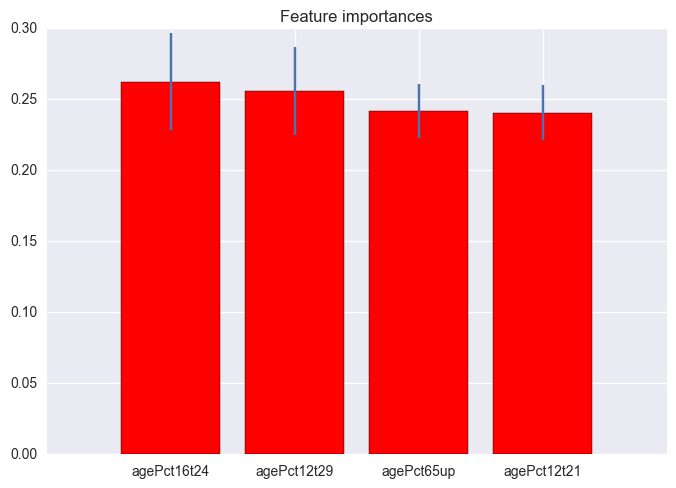

In [61]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

#X_arr = feature_matrix_clean
#y_arr = [ (1 if (x > AVG_CRIME) else 0) for x in target_vector1_clean]
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#num_attributes = len(X_arr[0])
top_x = 4 # just get top 4
for f in range(top_x):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], df2.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(top_x), importances[indices[:top_x]],
       color="r", yerr=std[indices[:top_x]], align="center")
plt.xticks(range(top_x), [df2.columns[indices[i]] for i in range(top_x)])
plt.xlim([-1, top_x])
plt.show()

In [62]:
# random forest w/ CV
predicted_rf_cv = cross_validation.cross_val_predict(RandomForestClassifier(n_estimators=20), X, y, cv=10)
print(metrics.accuracy_score(y, predicted_rf_cv))
print(metrics.classification_report(y, predicted_rf_cv))

0.705616850552
             precision    recall  f1-score   support

      False       0.76      0.84      0.80      1362
       True       0.55      0.42      0.47       632

avg / total       0.69      0.71      0.69      1994



In [63]:
cm1b = confusion_matrix(y, predicted_rf_cv)
statistical_measures(cm1b)

{'ACC': array([ 0.70561685,  0.70561685]),
 'FDR': array([ 0.24388632,  0.45322245]),
 'FNR': array([ 0.16005874,  0.58386076]),
 'FPR': array([ 0.58386076,  0.16005874]),
 'NPV': array([ 0.54677755,  0.75611368]),
 'PPV': array([ 0.75611368,  0.54677755]),
 'TNR': array([ 0.41613924,  0.83994126]),
 'TPR': array([ 0.83994126,  0.41613924])}

In [64]:
def cm_analysis(confusion_matrix):
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]
    TN = confusion_matrix[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    return {'true positive':TPR, 'true negative':TNR, 'precision':PPV, 'negative predictive val':NPV, 'false positive':FPR, 'false negative':FNR, 'false discovery':FDR, 'Accuracy':ACC}

In [65]:
cm_analysis(cm2)

{'Accuracy': 0.6855941114616193,
 'false discovery': 0.50495049504950495,
 'false negative': 0.83221476510067116,
 'false positive': 0.078101071975497705,
 'negative predictive val': 0.70823529411764707,
 'precision': 0.49504950495049505,
 'true negative': 0.92189892802450235,
 'true positive': 0.16778523489932887}

In [66]:
statistical_measures(cm2)

{'ACC': array([ 0.68559411,  0.68559411]),
 'FDR': array([ 0.29176471,  0.5049505 ]),
 'FNR': array([ 0.07810107,  0.83221477]),
 'FPR': array([ 0.83221477,  0.07810107]),
 'NPV': array([ 0.4950495 ,  0.70823529]),
 'PPV': array([ 0.70823529,  0.4950495 ]),
 'TNR': array([ 0.16778523,  0.92189893]),
 'TPR': array([ 0.92189893,  0.16778523])}